In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import matrix
import matplotlib.pyplot as plt
import time

In [2]:
# Theta Values in degree

t0 = 0
t1 = 0
t2 = 0

In [3]:
# Theta Values in radians

t0 = t0/180*np.pi
t1 = t1/180*np.pi
t2 = t2/180*np.pi

In [4]:
# Translational Elementsin inches

a0 = 2
a1 = 7
a2 = 3

In [5]:
# del theta change in angles

dT0 = 0.01
dT1 = 0.05
dT2 = 0.1

t0_1 = t0 + dT0
t1_1 = t1 + dT0
t2_1 = t2 + dT0


dt = 0.1

In [6]:
# Desired values

# Traslation vectors x,y,z are
e_des = np.matrix([[5],[2],[2]])

q = 0.1 
jhf = 1
inside = True

In [7]:
def end_eff_pos(t0,t1,t2):
    # Parameter table with columns " theta, alpha, r or a, d "

    
    
    
    param_tab = [[t0 ,      0         ,  a0  ,  0  ],
                 [t1 , -(90/180*np.pi),  a1  ,  0  ],
                 [t2 ,      0         ,  a2  ,  0  ]]
    
    # Transformation matrix

    i=0
    T0_1 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]) , np.sin(param_tab[i][1])*np.sin(param_tab[i][0]) , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]

    i=1
    T1_2 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]) , np.sin(param_tab[i][1])*np.sin(param_tab[i][0]) , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]

    i=2
    T2_3 = [[np.cos(param_tab[i][0]) , -np.cos(param_tab[i][1])*np.sin(param_tab[i][0]) , np.sin(param_tab[i][1])*np.sin(param_tab[i][0]) , param_tab[i][2]*np.cos(param_tab[i][0])],
            [np.sin(param_tab[i][0]) , np.cos(param_tab[i][1])*np.cos(param_tab[i][0]) , -np.sin(param_tab[i][1])*np.cos(param_tab[i][0]) , param_tab[i][2]*np.sin(param_tab[i][0])],
            [           0            ,            np.sin(param_tab[i][1])              ,       np.cos(param_tab[i][1])                    ,     param_tab[i][3]                    ],
            [0  ,  0  ,  0  ,  1 ]]
    
    # Finding T0_3 matrix

    T0_2 = np.dot(T0_1,T1_2)
    T0_3 = np.dot(T0_2,T2_3)
    
    O0_3 = np.matrix(T0_3)[0:3,3]  # End Effector
    
    return O0_3    
    

In [8]:
def sign(a,b):
    return np.sign(np.subtract(a,b))

In [9]:
# Loop program starts 

while (inside):
    
    e = end_eff_pos(t0,t1,t2)
    if jhf == 1:
        ini_pos = e
        jhf = 987
    
    e_t0 = end_eff_pos(t0_1,t1,t2)
    
    e_t1 = end_eff_pos(t0,t1_1,t2)
    
    '''
    # End effector equation of 
    e_t2 = end_eff_pos(t0,t1,t2_1)
    t2_1 += dT2
    print(e_t2)
    print()
    '''
    #print('e')
    #print(e)
    
    
    j = [[np.squeeze(np.asarray(e_t0[0][0])) - np.squeeze(np.asarray(e[0][0])) , \
          np.squeeze(np.asarray(e_t1[0][0])) - np.squeeze(np.asarray(e[0][0]))], \
         
         [np.squeeze(np.asarray(e_t0[1][0])) - np.squeeze(np.asarray(e[1][0])) , \
          np.squeeze(np.asarray(e_t1[1][0])) - np.squeeze(np.asarray(e[1][0]))]]
    
    '''
    #  Jacobian matrix in 3-D joints
    
    j = [[np.squeeze(np.asarray(e_t0[0][0])) - np.squeeze(np.asarray(e[0][0])) , \
          np.squeeze(np.asarray(e_t1[0][0])) - np.squeeze(np.asarray(e[0][0])) , \
          np.squeeze(np.asarray(e_t2[0][0])) - np.squeeze(np.asarray(e[0][0]))], \
         
         [np.squeeze(np.asarray(e_t0[1][0])) - np.squeeze(np.asarray(e[1][0])) , \
          np.squeeze(np.asarray(e_t1[1][0])) - np.squeeze(np.asarray(e[1][0])) , \
          np.squeeze(np.asarray(e_t2[1][0])) - np.squeeze(np.asarray(e[1][0]))], \
    
         [np.squeeze(np.asarray(e_t0[2][0])) - np.squeeze(np.asarray(e[2][0])) , \
          np.squeeze(np.asarray(e_t1[2][0])) - np.squeeze(np.asarray(e[2][0])) , \
          np.squeeze(np.asarray(e_t2[2][0])) - np.squeeze(np.asarray(e[2][0]))]]
    
    '''
    
    J = np.dot(j,0.001)
        
    J_inv = inv(J)
    '''
    #  small percent of the line equation
    x_p = np.squeeze(np.asarray(e[0][0])) + (np.squeeze(np.asarray(e_des[0][0])) - np.squeeze(np.asarray(e[0][0])))*q
    y_p = np.squeeze(np.asarray(e[1][0])) + (np.squeeze(np.asarray(e_des[1][0])) - np.squeeze(np.asarray(e[1][0])))*q
    '''
    
    # Moves equal distance
    
    p =0.0001
    
    sign_x = sign((np.squeeze(np.asarray(e_des[0][0]))) , np.squeeze(np.asarray(e[0][0])))
    sign_y = sign((np.squeeze(np.asarray(e_des[1][0]))) , np.squeeze(np.asarray(e[1][0])))
    #print(sign_x)
    #print(sign_y)
    
    x_p = np.squeeze(np.asarray(e[0][0])) + p*sign_x
    y_p = np.squeeze(np.asarray(e[1][0])) + p*sign_y
    
    #print(x_p)
    #print(y_p)
    
    e_del_x = np.squeeze(np.asarray(e[0][0])) - x_p
    e_del_y = np.squeeze(np.asarray(e[1][0])) - y_p
    
    if e_del_x > e_del_y:
        e_del_y /= e_del_x
        e_del_x = 1
    else:
        e_del_x /= e_del_y
        e_del_y = 1
    
    e_del_norm = np.dot([[e_del_x],[e_del_y]],0.0001)
    
    #print('e_del_norm')
    #print(e_del_norm)
    
    t_del = np.dot(J_inv,e_del_norm)
    '''
    print("J Inv")
    print(J_inv)
    print()
    print(t_del)
    print()
    print([[t0],[t1]])
    '''
    t_new = np.add([[t0],[t1]],t_del)
    [[t0],[t1]] = t_new
    #print(t_new)
    t0_1 = t0 + dT0
    t1_1 = t1 + dT0

    met = np.sqrt(((np.squeeze(np.asarray(e[0][0])))-(np.squeeze(np.asarray(e_des[0][0]))))**2 +\
                  ((np.squeeze(np.asarray(e[1][0])))-(np.squeeze(np.asarray(e_des[1][0]))))**2)
    
    
    
    # Plot 
    plt.plot(0,0,'ko')
    plt.plot(np.squeeze(np.asarray(ini_pos[0][0])), np.squeeze(np.asarray(ini_pos[1][0])), 'yo')    
    plt.plot(np.squeeze(np.asarray(e[0][0])), np.squeeze(np.asarray(e[1][0])), 'ro')
    plt.plot(np.squeeze(np.asarray(e_des[0][0])), np.squeeze(np.asarray(e_des[1][0])), 'bo')
    plt.show
    
    #print(met)
    #print("-------------")
    if met < 0.3: inside = False


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F7DF38E730> (for post_execute):


KeyboardInterrupt: 

In [234]:
assd = np.sin()
assd

-0.27941549819892586

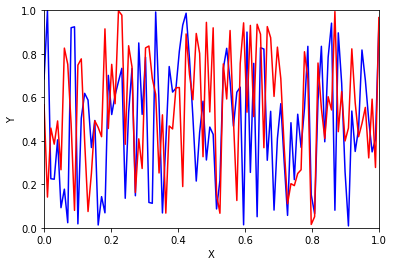

In [168]:

import numpy as np
import matplotlib.pyplot as plt
import time

def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(5):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [1]:
from graphics import *
win = GraphWin()

In [2]:
pt = Point(1024, 1024)
pt.draw(win)

Point(1024.0, 1024.0)

In [6]:
rect = Rectangle(Point(20, 10), pt)
rect.setFill('blue')
rect.draw(win)

Rectangle(Point(20.0, 10.0), Point(100.0, 50.0))

In [49]:
win = GraphWin('Face', 200, 150) # give title and dimensions
win.yUp() # make right side up coordinates!

AttributeError: 'GraphWin' object has no attribute 'yUp'

In [7]:
head = Circle(Point(40,100), 25) # set center and radius
head.setFill('yellow')
head.draw(win)

eye1 = Circle(Point(30, 105), 5)
eye1.setFill('black')
eye1.draw(win)



Circle(Point(30.0, 105.0), 5)

In [3]:
joint1 = Rectangle(Point(1, 1), pt)
joint1.setFill('yellow')
joint1.draw(win)

Rectangle(Point(1.0, 1.0), Point(1024.0, 1024.0))